# Table of Contents

   1. Importing libraries and data
   2. Data Privacy
   3. Customer Profiling
   3.1.1 Exclusion of customers with definite conditions
   3.1.2 Customer behavior in different geographic areas. Regional segmentation of the data
   3.1.3 Difference in spending habits between different U.S. regions
   3.2 Grouping
   3.2.1 Age Grouping
   3.2.2 Income Grouping
   3.2.3 Dependent Grouping
   3.2.4 Departments grouping
   3.2.5 Time of day grouping
   3.2.6 Time of week grouping
   4. Visualizations of Profiles
   Regions/Departments Comparison
   5. Export Final Data Set & Visualizations

# 1. Importing libraries and data

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Set the path
path = r'C:\Users\midov\Documents\Studies\Data Analysis\Immersion into Data Analytics\Achievement 4_Python Fundamentals for Data Analysts\Instacart Basket Analysis'

In [4]:
#Import dataframe from Exercise 4.9
df = pd.read_pickle(os.path.join(path,'Data','Prepared Data', 'df_merged_final.pkl'))

# 2. Data Privacy

In [5]:
#looking for PII columns
df.columns

Index(['Unnamed: 0', 'order_id', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_last_order',
       'new_customer', 'product_id', 'add_to_cart_order', 'reordered',
       '_merge', 'product_name', 'aisle_id', 'department_id', 'prices',
       'max_order', 'loyalty_flag', 'avg_price', 'median_order_duration',
       'Frequency_flag', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'no_of_dependants', 'marital_status', 'income'],
      dtype='object')

In [6]:
#Exclude the 'first_name' and 'last_name' columns as PII data
df.drop(['first_name', 'surname'],inplace=True, axis=1)

# 3. Customer Profiling

## 3.1.1 Exclusion of customers who don’t generate much revenue for the app

In [7]:
#Create an exclusion flag for low-activity customers (customers with less than 5 orders) by creating variable for number of orders made by user and counting of user_id 
df['total_orders']=df.groupby(['user_id']).user_id.transform('count')

In [8]:
#Create an exclusion flag by counting the amount of times user_id appears in dataframe (customers with less than 5 orders have low activity)
results_2=[]
for total in df['total_orders']:
    if total < 5:
        results_2.append('Low Activity')
    else:
        results_2.append('Regular Activity')

In [9]:
#Include new column in dataframe
df['activity_flag']=results_2

In [10]:
df['activity_flag'].value_counts(dropna=False)

Regular Activity    8528
Name: activity_flag, dtype: int64

#There are no low activity customers in the data set. This result may be due to the purposive reduction of the final df in task 4.9. 

In [11]:
#Check the df
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,avg_price,median_order_duration,Frequency_flag,gender,state,age,date_joined,no_of_dependants,marital_status,income,total_orders,activity_flag
0,0,2539329,1,1,2,8,NaN,True,196,1,0,both,Soda,77,7,9.0,10,New customer,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Regular Activity
1,1,2398795,1,2,3,7,15.0,False,196,1,1,both,Soda,77,7,9.0,10,New customer,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Regular Activity
2,2,473747,1,3,3,12,21.0,False,196,1,1,both,Soda,77,7,9.0,10,New customer,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Regular Activity
3,3,2254736,1,4,4,7,29.0,False,196,1,1,both,Soda,77,7,9.0,10,New customer,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Regular Activity
4,4,431534,1,5,4,15,28.0,False,196,1,1,both,Soda,77,7,9.0,10,New customer,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Regular Activity


## 3.1.2 Customer behavior in different geographic areas. Regional segmentation of the data.

In [12]:
#Create region Northeast
Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [13]:
#Create region Midwest
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas',
         'Minnesota','Iowa','Missouri']

In [14]:
#Create region South
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina',
       'Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [15]:
#Create region West
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon',
      'California','Hawaii']

In [16]:
#Loop for column Region
result=[]
for state in df['state']:
    if state in Northeast:
        result.append('Northeast')
    elif state in Midwest:
        result.append('Midwest')
    elif state in South:
        result.append('South')
    else:
        result.append('West')

In [17]:
#Include new column Region into df
df['region']=result

In [18]:
#Check the df
df['region'].value_counts()

West         2572
South        2305
Midwest      2067
Northeast    1584
Name: region, dtype: int64

## 3.1.3 Difference in spending habits between the different U.S. regions

In [19]:
#Aggregate for the regional expenditure
df.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    22.037155  1.0  14900.0
Northeast   7.516162  1.0     23.2
South       7.792061  1.0     24.2
West        8.017924  1.0     24.0

Midwest spends more than other regions

In [20]:
#Aggregate for regional total_orders
df.groupby('region').agg({'total_orders': ['mean', 'min', 'max']})

total_orders         
                  mean min  max
region                         
Midwest     248.446541  11  453
Northeast   440.239899  21  766
South       146.285033  18  299
West        316.262053  14  617

Northeast customers do more orders than other regions

# 3.2 Grouping

## 3.2.1 Age grouping

Age range 1 = Young Adult >= 18 & <35

Age range 2 = Adult >=35 & <65

Age range 3 = Senior >= 65

In [21]:
#Create age group flag
#Age range 1 = Young Adult >= 18 & <35
#Age range 2 = Adult >=35 & <65
#Age range 3 = Senior >= 65

df.loc[(df['age'] >= 18) & (df['age'] <= 35), 'age_range'] = '1'
df.loc[(df['age'] > 35) & (df['age'] < 65), 'age_range'] = '2'
df.loc[(df['age'] >= 65), 'age_range'] = '3'
df['age_range'].value_counts()

2    4273
3    3067
1    1188
Name: age_range, dtype: int64

Adults within age group 35-65 is the most numerous group of customers

## 3.2.2 Income Grouping

In [22]:
#Less than 50,000 = Low Income
#Between 50,000 - 120,000 = Middle Income
#Above 120,000 = High Income

#Create income flags
df.loc[df['income']<50000, 'Income_flag'] = 'Low Income'
df.loc[(df['income']>=50000) & (df['income']<=120000), 'Income_flag'] = 'Middle Income' 
df.loc[df['income']>120000, 'Income_flag'] = 'High Income'
df['Income_flag'].value_counts(dropna = False)

Middle Income    4509
High Income      3333
Low Income        686
Name: Income_flag, dtype: int64

The majority of customers fall within the Middle Income bracket making between 50,000 and 120,000

## 3.2.3 Dependent Grouping

In [23]:
#Customers with 0 dependents = no dependents
#Customers with 1 or more dependents = has dependent/s

#Create flag for customers with no dependents
df.loc[df['no_of_dependants']== 0, 'Dependent_flag'] = 'No Dependents'
# Create flag for 1 or more dependents
df.loc[df['no_of_dependants'] > 0, 'Dependent_flag'] = 'Has Dependent/s'

In [24]:
#Check values
df['Dependent_flag'].value_counts()

Has Dependent/s    6365
No Dependents      2163
Name: Dependent_flag, dtype: int64

In [25]:
#Aggregate dependent expenditure
df.groupby('Dependent_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
Dependent_flag                          
Has Dependent/s  12.479576  1.0  14900.0
No Dependents     7.677624  1.1     24.7

Customers with dependents spend more on average

## 3.2.4 Departments grouping

In [26]:
#Import departments df
departments=pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'),index_col=False)

In [27]:
#Create data dictionary for department_id
zipped=zip(departments['Unnamed: 0'], departments['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [28]:
# Map departments' names to department_id in dataframe
df['department'] = df['department_id'].map(data_dict)
df.head()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,avg_price,median_order_duration,Frequency_flag,gender,state,age,date_joined,no_of_dependants,marital_status,income,total_orders,activity_flag,region,age_range,Income_flag,Dependent_flag,department
0,0,2539329,1,1,2,8,NaN,True,196,1,0,both,Soda,77,7,9.0,10,New customer,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Regular Activity,South,1,Low Income,Has Dependent/s,beverages
1,1,2398795,1,2,3,7,15.0,False,196,1,1,both,Soda,77,7,9.0,10,New customer,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Regular Activity,South,1,Low Income,Has Dependent/s,beverages
2,2,473747,1,3,3,12,21.0,False,196,1,1,both,Soda,77,7,9.0,10,New customer,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Regular Activity,South,1,Low Income,Has Dependent/s,beverages
3,3,2254736,1,4,4,7,29.0,False,196,1,1,both,Soda,77,7,9.0,10,New customer,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Regular Activity,South,1,Low Income,Has Dependent/s,beverages
4,4,431534,1,5,4,15,28.0,False,196,1,1,both,Soda,77,7,9.0,10,New customer,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Regular Activity,South,1,Low Income,Has Dependent/s,beverages


In [29]:
#Create subset for customers who have purchased baby products from Babies Department
parents=df.loc[df['department']=='babies']

In [30]:
parents.head()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,avg_price,median_order_duration,Frequency_flag,gender,state,age,date_joined,no_of_dependants,marital_status,income,total_orders,activity_flag,region,age_range,Income_flag,Dependent_flag,department
3274,700,3067010,50,22,1,12,7.0,False,5922,1,0,both,"Honest Face, Hand, & Baby Wipes",56,18,6.2,67,Loyal customer,7.899117,5.0,Frequent customer,Female,Wisconsin,67,10/31/2018,2,married,132424,453,Regular Activity,Midwest,3,High Income,Has Dependent/s,babies
3275,715,2425696,50,37,4,15,3.0,False,5922,1,1,both,"Honest Face, Hand, & Baby Wipes",56,18,6.2,67,Loyal customer,7.899117,5.0,Frequent customer,Female,Wisconsin,67,10/31/2018,2,married,132424,453,Regular Activity,Midwest,3,High Income,Has Dependent/s,babies
3276,728,2018336,50,50,1,11,3.0,False,5922,10,1,both,"Honest Face, Hand, & Baby Wipes",56,18,6.2,67,Loyal customer,7.899117,5.0,Frequent customer,Female,Wisconsin,67,10/31/2018,2,married,132424,453,Regular Activity,Midwest,3,High Income,Has Dependent/s,babies
3298,732,642111,50,54,6,10,3.0,False,1202,11,0,both,Organic Whole Grain Oatmeal Cereal Baby Food,92,18,5.8,67,Loyal customer,7.899117,5.0,Frequent customer,Female,Wisconsin,67,10/31/2018,2,married,132424,453,Regular Activity,Midwest,3,High Income,Has Dependent/s,babies
3468,913,584586,59,1,5,15,NaN,True,47719,4,0,both,Banana Raspberry & Brown Rice Stage 2,92,18,9.6,10,New customer,7.176087,15.0,Regular customer,Male,Delaware,49,3/6/2017,2,married,71218,92,Regular Activity,South,2,Middle Income,Has Dependent/s,babies


In [31]:
#Aggregate for parent expenditure
parents.groupby('department').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
department                     
babies      7.389474  1.8  14.5

In [32]:
#Check on what department customers spend the most
df[['prices', 'department']].groupby('department').agg('sum').sort_values(by ='prices', ascending=False)

,prices
department,
dairy eggs,41908.9
produce,16202.6
beverages,9056.8
pantry,5086.0
frozen,5053.6
snacks,3580.9
meat seafood,2746.1
bakery,1989.1
canned goods,1790.0


Customers spend most of all on dairy and eggs and least of all - on pets and the department labelled 'other'

## 3.2.5 Time of day grouping

In [33]:
#Time of day breakdown:
#12:00 am - 05:59 am = Night
#06:00 am - 11:59 pm = Morning
#12:00 pm - 04:59 pm = Afternoon
#05:00 pm - 11:59 pm = Evening 
        
#Create a dataframe that lists orders without any duplicates 
df_ord = df.drop_duplicates(subset='order_id').copy()
df_ord.shape        

(936, 35)

In [34]:
#Create list of break down of day 
df_ord.loc[(df_ord['order_hour_of_day'] > 0) & (df_ord['order_hour_of_day'] < 6), 'Time_of_day'] = 'Night'
df_ord.loc[(df_ord['order_hour_of_day'] >= 6) & (df_ord['order_hour_of_day'] < 12), 'Time_of_day'] = 'Morning'
df_ord.loc[(df_ord['order_hour_of_day'] >= 12) & (df_ord['order_hour_of_day'] < 17), 'Time_of_day'] = 'Afternoon'
df_ord.loc[(df_ord['order_hour_of_day'] >= 17) & (df_ord['order_hour_of_day'] < 0), 'Time_of_day'] = 'Evening'
df_ord['Time_of_day'].value_counts()

Morning      386
Afternoon    370
Night          9
Name: Time_of_day, dtype: int64

Most orders are made in the morning, less - at night time

## 3.2.6 Time of week grouping

In [35]:
#Check for the frequnecy of orders on each day of the week
df_ord['orders_day_of_week'].value_counts(dropna = False)

1    200
5    141
2    137
0    127
3    123
6    106
4    102
Name: orders_day_of_week, dtype: int64

Sunday (corresponding number 1) is the busiest day of the week. Wednesday (number 4) is the least busy.

# 4 Visualizations of Profiles

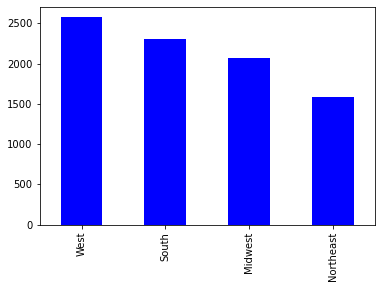

In [36]:
#Bar chart showing regional distribution of customers
regional_bar=df['region'].value_counts().plot.bar(color='blue', fontsize=10)

The majority of customers are from West, the minority - from Northeast

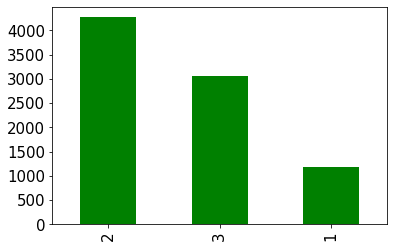

In [38]:
#Create bar chart for orders made by each age group
age_bar=df['age_range'].value_counts().plot.bar(color='green',fontsize=15)

Age range 1 = Young Adult >= 18 & <35

Age range 2 = Adult >=35 & <65

Age range 3 = Senior >= 65

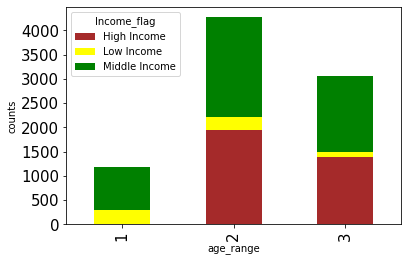

In [39]:
#Create stacked bar chart for age groups and income groups
age_income_bar=df.groupby('age_range')['Income_flag'].value_counts().unstack().plot.bar(stacked=True,
                                                    ylabel='counts',color=['brown','yellow','green'], fontsize=15)

Highest income customers are in age group 2 (35-65). Lowest level of low income customers are in group 3 (65 and older)

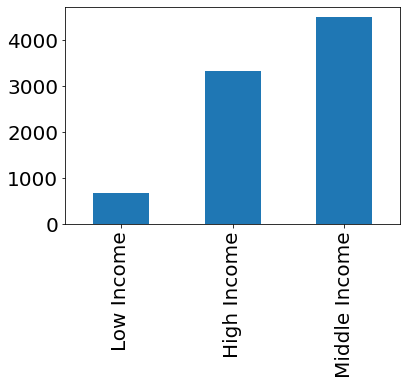

In [40]:
#Create bar chart for orders made by each income group
income_bar=df['Income_flag'].value_counts().sort_values().plot.bar(fontsize=20)

Less than 50,000 = Low Income;
Between 50,000 - 120,000 = Middle Income;
Above 120,000 = High Income

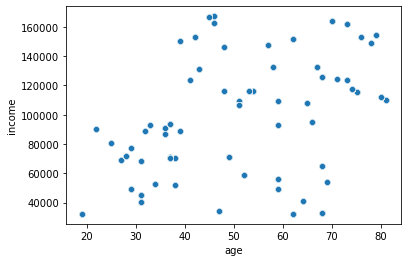

In [41]:
#Explore if there’s a connection between age and spending power (income).
#Create a scatterplot using the sns.scatterplot() function
scatterplot_income = sns.scatterplot(x = 'age', y = 'income', data = df)

The customers of age group 25-40 have income up to $100,000. The income of 40+ group almost doubles. The higher the age, the higher is the spending power. The highest spending power belongs to around 50 and 70 year olds.

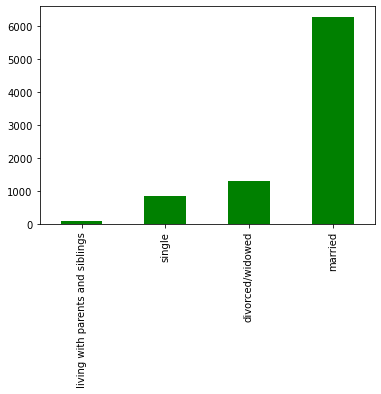

In [43]:
#Create bar chart showing the orders made by customers of each family status
marital_bar=df['marital_status'].value_counts().sort_values().plot.bar(color='green', fontsize=10)

Married customers do more orders

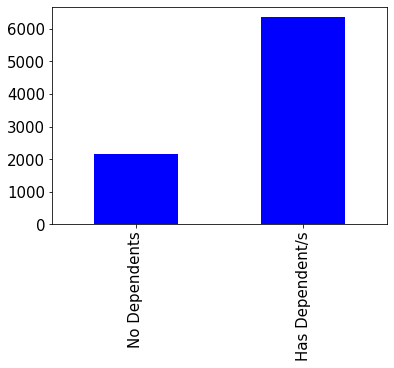

In [45]:
#Create bar chart showing the amount of orders made by customers in each dependent flag
dependent_bar=df['Dependent_flag'].value_counts().sort_values().plot.bar(color='blue', fontsize=15)

Most customers have dependents

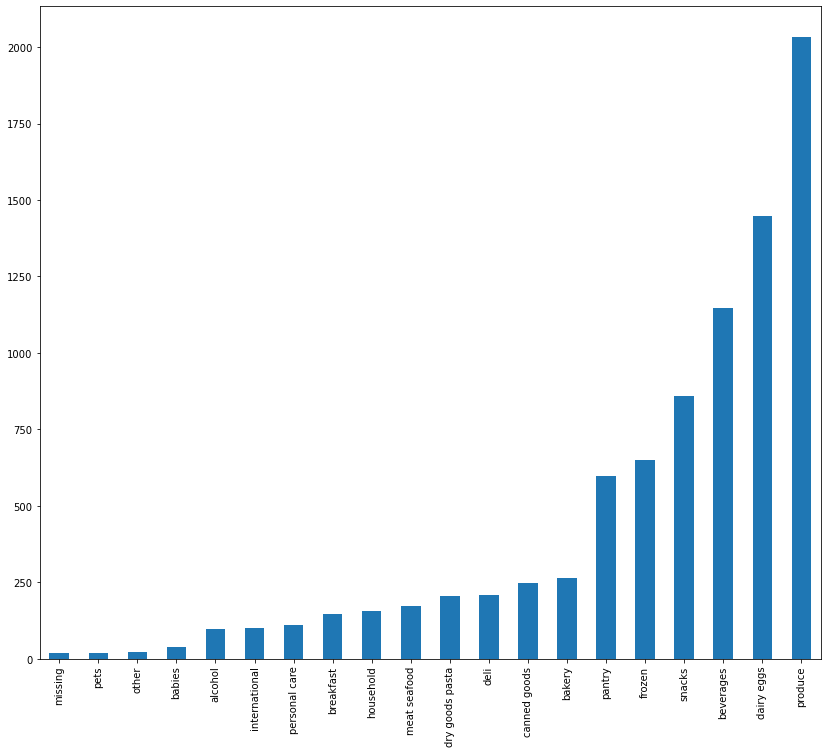

In [46]:
#Create bar chart showing the orders made for each department
department_bar=df.department.value_counts().sort_values().plot(kind = 'bar', figsize=[14,12])

Produce department has the largest number of orders

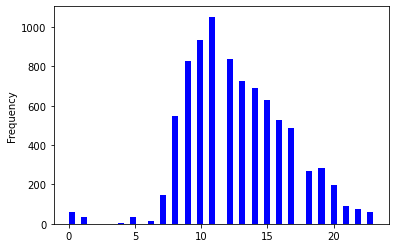

In [47]:
#Create a histogram displaying time of day when most orders are placed
time_of_day_bar = df['order_hour_of_day'].plot.hist(bins = 50, color = 'blue')

Most sales are done close to 11am with subsequent decline after noon. Sales activity at night is insignificant but still exists.

### 4.1 Regions/Departments Comparison

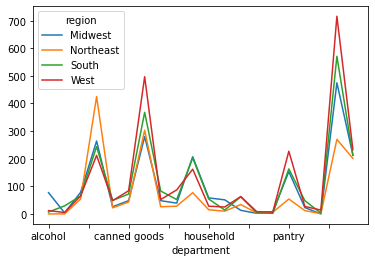

In [48]:
#Create line chart for products purchased in each department for region
dep_region_cross=pd.crosstab(df['department'],df['region'], dropna=False).plot(kind='line')

The chart shows that, for example, West customers prefer goods from Pantry department more than South or Northeast customers

In [49]:
#Create subset with user_id and loyalty columns
custumer_loyalty=df[['user_id','loyalty_flag']]
# removing duplicate values
custumer_loyalty_unique=custumer_loyalty.drop_duplicates()

In [50]:
custumer_loyalty_unique['loyalty_flag'].value_counts()

New customer        36
Regular customer    25
Loyal customer       3
Name: loyalty_flag, dtype: int64

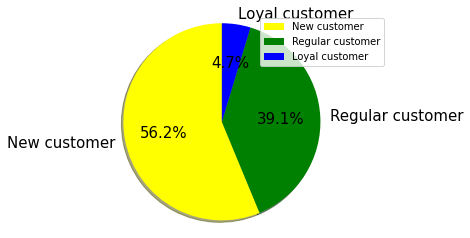

In [51]:
#Create pie chart for loyalty_flag
labels = 'New customer', 'Regular customer', 'Loyal customer'
sizes = custumer_loyalty_unique['loyalty_flag'].value_counts()
colors = ['yellow','green','blue']
textprops = {"fontsize":15}

loyal, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=textprops)
ax.axis('equal')  

plt.legend()
plt.show()
loyal.savefig ('loyal_pie.png', bbox_inches='tight')

# Export Final Data Set & Visualizations

In [ ]:
#Export final dataset
df.to_pickle(os.path.join(path, 'Data','Prepared Data', 'final_dataset.pkl'))

In [ ]:
#Export bar chart showing regional distribution of customers
regional_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'regional_bar.png'))

In [ ]:
#Export bar chart shoing orders made by each age group
age_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_bar.png'))

In [ ]:
#Export stacked bar chart for age groups and income groups
age_income_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_income__bar.png'))

In [ ]:
#Export bar chart for orders made by each income group
income_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income__bar.png'))

In [ ]:
#Export scatterplot showing the connection between age and spending power (income)
scatterplot_income.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_income.png'))

In [ ]:
#Export bar chart showing the orders made by customers of each family status
marital_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'marital_bar.png'))

In [52]:
#Export bar chart showing the amount of orders made by customers in each dependent flag
dependent_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'dependent_bar.png'))

In [ ]:
#Export bar chart showing the orders made for each department
department_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'department_bar.png'))

In [ ]:
#Export histogram displaying time of day when most orders are placed
time_of_day_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'time_of_day_bar.png'))

In [ ]:
#Export line chart for products purchased in each department for region
dep_region_cross.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'dep_region_cross.png'))

In [ ]:
#Export loyalty pie chart 
loyal.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyal_pie.png'))

In [ ]:
#Export bar chart showing regional distribution of customers
regional_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'regional_bar.png'))